# Wine Quality

In [56]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

# Training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [30]:
df = pandas.read_csv('../Datasets/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [44]:
def getStats(yTest, yPred):
    print('MAE', mean_absolute_error(yTest, yPred))
    print('MSE', mean_squared_error(yTest, yPred))
    print('R2 score:', r2_score(yTest, yPred))
    plt.figure(figsize = (10, 5))
    plt.subplot(1, 2, 1)
    plt.boxplot([yTest, yPred], labels = ['yTest', 'yPred'])
    plt.subplot(1, 2, 2)
    mini, maxi = 0, 0
    plt.scatter(yTest, yPred)
    plt.plot([mini := np.min([*yTest, *yPred]), maxi := np.max([*yTest, *yPred])], [mini, maxi])
    plt.show()

## First Experiment

### Randomly divide the data into training (70%) and testing (30%) sets

In [26]:
x, y = df.values[:, :-1], df.values[:, -1]
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 0) #Random-state is the seed
print('X:', x.shape, 'Y:', len(y))
print('xTrain:', xTrain.shape, 'yTrain:', len(yTrain))
print('xTest:', xTest.shape, 'yTest:', len(yTest))

X: (1599, 11) Y: 1599
xTrain: (1119, 11) yTrain: 1119
xTest: (480, 11) yTest: 480


### Generate three regression models: 

#### Linear Regression


In [48]:
model = LinearRegression()
model.fit(xTrain, yTrain)
yPred = model.predict(xTest)

##### Print:

- MAE
- MSE
- R2 score, coefficient of determination
- Boxplot of the quality
- Scatter plot of real and predicted outputs

MAE 0.4871262164592858
MSE 0.4007803663750101
R2 score: 0.3207112434321864


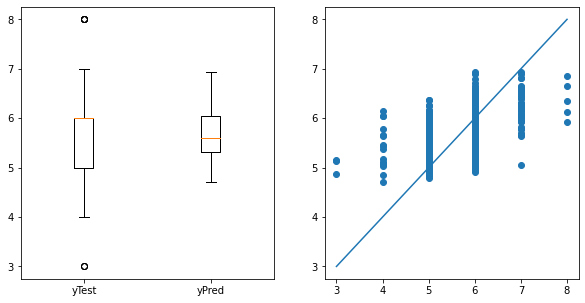

In [49]:
getStats(yTest, yPred)

#### Random Forest

In [50]:
model = RandomForestRegressor(random_state=0)
model.fit(xTrain, yTrain)
yPred = model.predict(xTest)

##### Print:

- MAE
- MSE
- R2 score, coefficient of determination
- Boxplot of the quality
- Scatter plot of real and predicted outputs

MAE 0.43652083333333336
MSE 0.3536022916666666
R2 score: 0.4006740819209039


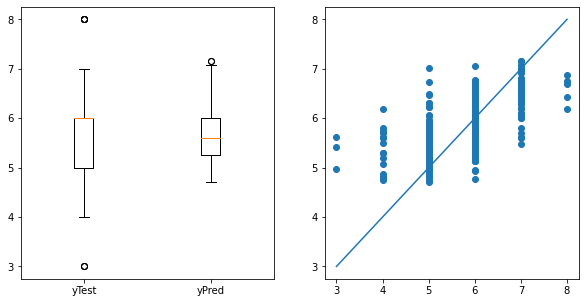

In [51]:
getStats(yTest, yPred)

#### MultiLayer Perceptron

In [52]:
model = MLPRegressor(random_state=0)
model.fit(xTrain, yTrain)
yPred = model.predict(xTest)

##### Print:

- MAE
- MSE
- R2 score, coefficient of determination
- Boxplot of the quality
- Scatter plot of real and predicted outputs

MAE 0.5438516464356039
MSE 0.4550963050367226
R2 score: 0.22865033044623284


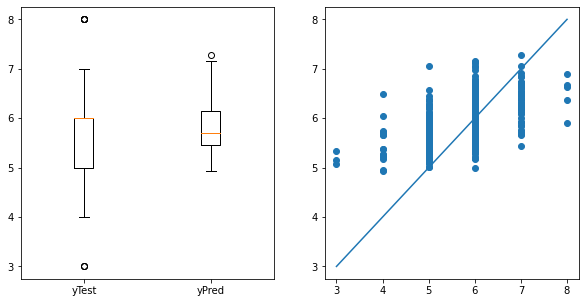

In [54]:
getStats(yTest, yPred)

## Second Experiment


### Randomly divide the data into 5 splits using [K-fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).



In [57]:
kf = KFold(n_splits = 5, random_state = 0, shuffle = True)

### For each iteration

#### Create three models: 
- Linear Regression

- Random Forest

- MultiLayer Perceptron


In [59]:
resultsL, resultsR, resultsM = [], [], []
for trainI, testI in kf.split(x):
    xTrain, yTrain = x[trainI, :], y[trainI]
    xTest, yTest = x[testI, :], y[testI]
    
    modelL = LinearRegression()
    modelL.fit(xTrain, yTrain)
    yPredL = modelL.predict(xTest)
    resultsL.append(r2_score(yTest, yPredL))

    modelR = RandomForestRegressor(random_state=0)
    modelR.fit(xTrain, yTrain)
    yPredR = modelR.predict(xTest)
    resultsR.append(r2_score(yTest, yPredR))

    modelM = MLPRegressor(random_state=0)
    modelM.fit(xTrain, yTrain)
    yPredM = modelM.predict(xTest)
    resultsM.append(r2_score(yTest, yPredM))    


## Generate a visualization

With three boxplots (each one per type of model) showing the values of R2 score.

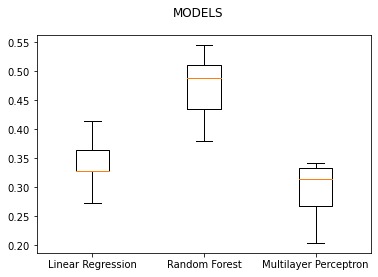

In [60]:
plt.figure()
plt.suptitle('MODELS')
plt.boxplot([resultsL, resultsR, resultsM], labels = ['Linear Regression', 'Random Forest', 'Multilayer Perceptron'])
plt.show()

# Conclusion

**Finally, write a small paragraph analyzing the results describing which one is the best model for this kind of data.**

> Based on the results of the experiments, I can see that this kind of data is harder to predict and it can be because of many reasons.

> As it's harder, results were worse than expected, but still, there's this model called Random Forest that was able to do way better than the others.